In [1]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read the data

df = pd.read_csv(r'C:\Users\asomu\Downloads\movies.csv\movies.csv')

In [48]:
#Getting familiar with the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [49]:
# Checking for missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0022103518143304474%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0001841959845275373%
budget - 0.0%
gross - 0.0%
company - 0.0003683919690550746%
runtime - 0.0001841959845275373%


In [50]:
# Data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [51]:
# Changing data type of the budget and gross column

df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

In [52]:
#Adding correct year column
#Splitting the released column so as to get the year

yearcol = df.released.str.split(pat= ' ', expand=True)
df['year(corrected)'] = yearcol[2]

In [53]:
#Sorting the data by the gross column DESC

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [7]:
#Increased the output didplay limit so I'd be able to view the entire returned output

pd.set_option('display.max_rows', None)

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [9]:
# Dropping Duplicates

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4699,6,6,1980,1307,8.4,927000,1798,2836,699,46,19000000,46998772,1430,146.0
1,3938,6,1,1980,1130,5.8,65000,1579,1156,215,47,4500000,58853106,454,104.0
2,3649,4,0,1980,1362,8.7,1200000,758,1818,1160,47,18000000,538375067,947,124.0
3,205,4,4,1980,1130,7.7,221000,889,1412,1476,47,3500000,83453539,1112,88.0
4,734,6,4,1980,1173,7.3,108000,720,352,272,47,6000000,39846344,1087,98.0


In [ ]:
#Dropped null rows

df = df.dropna()

<function matplotlib.pyplot.show(close=None, block=None)>

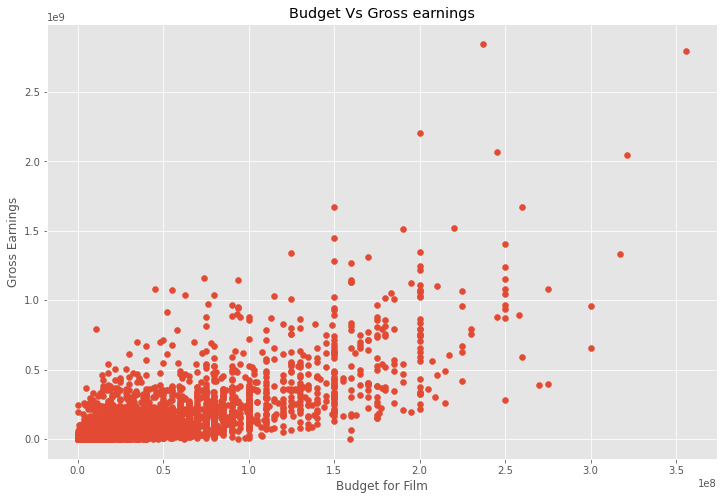

In [57]:
# Scatter plot of budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget Vs Gross earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show

In [ ]:
# Plot the budget vs gross using seaborn
sns.regplot(x='budget', y ='gross', data = df, scatter_kws={'color':'green'}, line_kws={'color':'black'})

In [81]:
# Looking at correlation

df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year(corrected)
name,1.000000,-0.023303,0.008828,0.024364,-0.005724,0.015233,0.012862,0.013874,0.011994,-0.006954,-0.024364,0.023728,0.005916,0.021040,0.010947,0.025922
rating,-0.023303,1.000000,0.127445,0.023971,0.019090,0.059418,0.009566,0.015217,-0.006699,0.004058,0.020513,-0.186522,-0.168632,-0.082041,0.133501,0.022705
genre,0.008828,0.127445,1.000000,-0.072227,0.022330,0.034497,-0.136381,-0.008911,0.017865,0.002633,-0.011688,-0.368885,-0.244442,-0.073376,-0.059891,-0.066836
year,0.024364,0.023971,-0.072227,1.000000,-0.001925,0.056057,0.205028,-0.037636,-0.025683,-0.032914,-0.067542,0.326987,0.273832,-0.013317,0.074028,0.994722
released,-0.005724,0.019090,0.022330,-0.001925,1.000000,0.046707,0.028950,0.003401,0.008760,0.015040,-0.017758,0.019713,0.008497,-0.003474,0.007948,-0.008893
score,0.015233,0.059418,0.034497,0.056057,0.046707,1.000000,0.474176,0.005597,0.012827,0.009414,-0.044206,0.072052,0.222393,0.021459,0.414919,0.061040
votes,0.012862,0.009566,-0.136381,0.205028,0.028950,0.474176,1.000000,-0.010362,-0.005693,-0.017169,0.042039,0.439789,0.614791,0.119456,0.352542,0.202007
director,0.013874,0.015217,-0.008911,-0.037636,0.003401,0.005597,-0.010362,1.000000,0.262823,0.036126,0.010954,-0.009591,-0.029525,-0.007175,0.018251,-0.034759
writer,0.011994,-0.006699,0.017865,-0.025683,0.008760,0.012827,-0.005693,0.262823,1.000000,0.019239,0.021942,-0.039816,-0.036274,-0.002268,-0.016535,-0.022068
star,-0.006954,0.004058,0.002633,-0.032914,0.015040,0.009414,-0.017169,0.036126,0.019239,1.000000,-0.010624,-0.021377,-0.000029,0.014826,0.012447,-0.032237


In [66]:
#I noticed high correlation between votes and gross, also noticed high correlation between budget and gross

<function matplotlib.pyplot.show(close=None, block=None)>

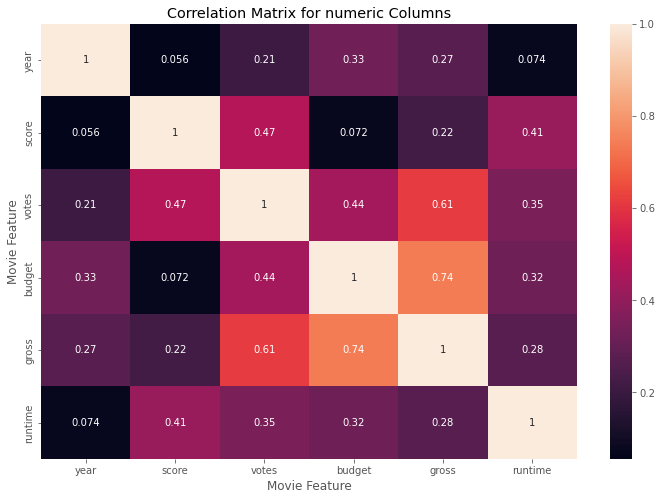

In [67]:
#Visualising the correlation

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for numeric Columns')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show

In [5]:
# Looking at the Correlation of company

df_companyid = df
for col_name in df_companyid:
    if(df_companyid[col_name].dtype == 'object'):
        df_companyid[col_name] = df_companyid[col_name].astype('category')
        df_companyid[col_name] = df_companyid[col_name].cat.codes

df_companyid

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4699,6,6,1980,1307,8.4,927000,1798,2836,699,46,19000000,46998772,1430,146.0
1,3938,6,1,1980,1130,5.8,65000,1579,1156,215,47,4500000,58853106,454,104.0
2,3649,4,0,1980,1362,8.7,1200000,758,1818,1160,47,18000000,538375067,947,124.0
3,205,4,4,1980,1130,7.7,221000,889,1412,1476,47,3500000,83453539,1112,88.0
4,734,6,4,1980,1173,7.3,108000,720,352,272,47,6000000,39846344,1087,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,416,6,0,2020,906,6.6,140000,17,2392,1817,47,90000000,426505244,454,124.0
5425,3564,4,0,2020,714,6.5,102000,852,2311,148,47,85000000,319715683,1112,99.0
5426,1155,4,1,2020,906,5.6,53000,1812,2831,1472,47,175000000,245487753,1401,101.0
5427,3987,4,1,2020,759,6.8,42000,296,2092,640,6,135000000,111105497,12,100.0


<function matplotlib.pyplot.show(close=None, block=None)>

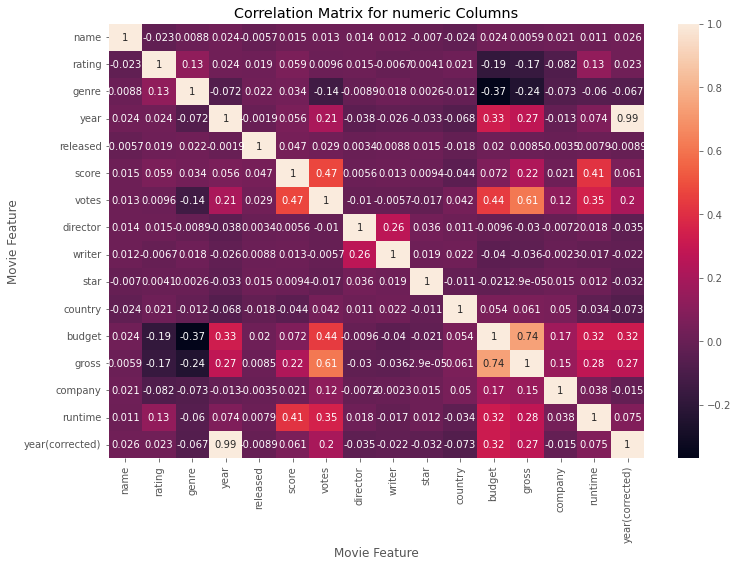

In [69]:
correlation_matrix = df_companyid.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for numeric Columns')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
plt.show

In [70]:
#There's no correlation between company and gross revenue

In [71]:
correlation = df_companyid.corr()
correlation

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year(corrected)
name,1.000000,-0.023303,0.008828,0.024364,-0.005724,0.015233,0.012862,0.013874,0.011994,-0.006954,-0.024364,0.023728,0.005916,0.021040,0.010947,0.025922
rating,-0.023303,1.000000,0.127445,0.023971,0.019090,0.059418,0.009566,0.015217,-0.006699,0.004058,0.020513,-0.186522,-0.168632,-0.082041,0.133501,0.022705
genre,0.008828,0.127445,1.000000,-0.072227,0.022330,0.034497,-0.136381,-0.008911,0.017865,0.002633,-0.011688,-0.368885,-0.244442,-0.073376,-0.059891,-0.066836
year,0.024364,0.023971,-0.072227,1.000000,-0.001925,0.056057,0.205028,-0.037636,-0.025683,-0.032914,-0.067542,0.326987,0.273832,-0.013317,0.074028,0.994722
released,-0.005724,0.019090,0.022330,-0.001925,1.000000,0.046707,0.028950,0.003401,0.008760,0.015040,-0.017758,0.019713,0.008497,-0.003474,0.007948,-0.008893
score,0.015233,0.059418,0.034497,0.056057,0.046707,1.000000,0.474176,0.005597,0.012827,0.009414,-0.044206,0.072052,0.222393,0.021459,0.414919,0.061040
votes,0.012862,0.009566,-0.136381,0.205028,0.028950,0.474176,1.000000,-0.010362,-0.005693,-0.017169,0.042039,0.439789,0.614791,0.119456,0.352542,0.202007
director,0.013874,0.015217,-0.008911,-0.037636,0.003401,0.005597,-0.010362,1.000000,0.262823,0.036126,0.010954,-0.009591,-0.029525,-0.007175,0.018251,-0.034759
writer,0.011994,-0.006699,0.017865,-0.025683,0.008760,0.012827,-0.005693,0.262823,1.000000,0.019239,0.021942,-0.039816,-0.036274,-0.002268,-0.016535,-0.022068
star,-0.006954,0.004058,0.002633,-0.032914,0.015040,0.009414,-0.017169,0.036126,0.019239,1.000000,-0.010624,-0.021377,-0.000029,0.014826,0.012447,-0.032237


In [72]:
corr_pairs = correlation.unstack()
corr_pairs

name             name               1.000000
                 rating            -0.023303
                 genre              0.008828
                 year               0.024364
                 released          -0.005724
                 score              0.015233
                 votes              0.012862
                 director           0.013874
                 writer             0.011994
                 star              -0.006954
                 country           -0.024364
                 budget             0.023728
                 gross              0.005916
                 company            0.021040
                 runtime            0.010947
                 year(corrected)    0.025922
rating           name              -0.023303
                 rating             1.000000
                 genre              0.127445
                 year               0.023971
                 released           0.019090
                 score              0.059418
          

In [73]:
sorted_cp = corr_pairs.sort_values()
sorted_cp

budget           genre             -0.368885
genre            budget            -0.368885
                 gross             -0.244442
gross            genre             -0.244442
rating           budget            -0.186522
budget           rating            -0.186522
gross            rating            -0.168632
rating           gross             -0.168632
votes            genre             -0.136381
genre            votes             -0.136381
company          rating            -0.082041
rating           company           -0.082041
company          genre             -0.073376
genre            company           -0.073376
country          year(corrected)   -0.072624
year(corrected)  country           -0.072624
year             genre             -0.072227
genre            year              -0.072227
year             country           -0.067542
country          year              -0.067542
year(corrected)  genre             -0.066836
genre            year(corrected)   -0.066836
          

In [75]:
high_corr = sorted_cp[sorted_cp > 0.6]
high_corr

votes            gross              0.614791
gross            votes              0.614791
                 budget             0.740323
budget           gross              0.740323
year(corrected)  year               0.994722
year             year(corrected)    0.994722
name             name               1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
year(corrected)  year(corrected)    1.000000
dtype: flo